In [2]:
!conda install pandas-profiling -y
!conda install ydata-profiling -y
!pip install pandas-profiling
!conda install vega_datasets -y
!pip install vega_datasets
!pip install hvplot
!conda install hvplot -y

/bin/bash: line 1: conda: command not found
/bin/bash: line 1: conda: command not found
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 73.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=778d9250898d3c306c3f16e83c0e8a9c9b5733eea4a3f92cafa186793bc3ee08
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
/bin/bash: line 1: conda: command not found
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.0/161.0 kB 

##Análise Detalhada: World's Best Restaurants Dataset
Este notebook realiza uma análise exploratória detalhada do dataset "WorldsBestRestaurants.csv", que contém informações sobre os melhores restaurantes do mundo ao longo dos anos. A análise inclui exploração inicial, tratamento de dados, visualizações, análise de correlações e a geração de um relatório automatizado.

###Importação de Bibliotecas
Nesta etapa, estamos importando as bibliotecas necessárias para o carregamento, análise e visualização dos dados.

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import hvplot.pandas
import ydata_profiling


###Carregamento e Exploração Inicial do Dataset
Aqui, carregamos o dataset "WorldsBestRestaurants.csv" e visualizamos suas primeiras linhas, as informações sobre tipos de dados e uma descrição estatística básica para entender sua estrutura.

In [19]:
# Carregando o dataset
df = pd.read_csv('WorldsBestRestaurants.csv')

# Visualizando as primeiras linhas do dataset
df.head()

# Informações sobre o dataset (tipos de dados, entradas não nulas)
df.info()

# Estatísticas descritivas do dataset
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        1050 non-null   int64  
 1   rank        1050 non-null   int64  
 2   restaurant  1050 non-null   object 
 3   location    1050 non-null   object 
 4   country     1050 non-null   object 
 5   lat         1050 non-null   float64
 6   lng         1050 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.5+ KB


,year,rank,lat,lng
count,1050.000000,1050.000000,1050.000000,1050.000000
mean,2012.142857,25.490476,35.231239,0.070343
std,6.276788,14.432130,24.690886,61.607445
min,2002.000000,1.000000,-38.336369,-122.870051
25%,2007.000000,13.000000,35.824923,-3.737738
50%,2012.000000,25.000000,43.318237,2.351377
75%,2017.000000,38.000000,48.857548,12.568337
max,2023.000000,50.000000,63.843390,151.209295


###Tratamento de Valores Nulos
Nesta etapa, verificamos e tratamos os valores nulos presentes no dataset. Caso haja valores ausentes, substituímos por 'Unknown'.

In [20]:
# Identificando valores nulos
df.isnull().sum()

# Preenchendo ou removendo valores nulos (se necessário)
df.fillna('Unknown', inplace=True)


###Distribuição de variáveis categóricas
Aqui, visualizamos a distribuição das variáveis categóricas presentes no dataset, como o nome do restaurante e o país.



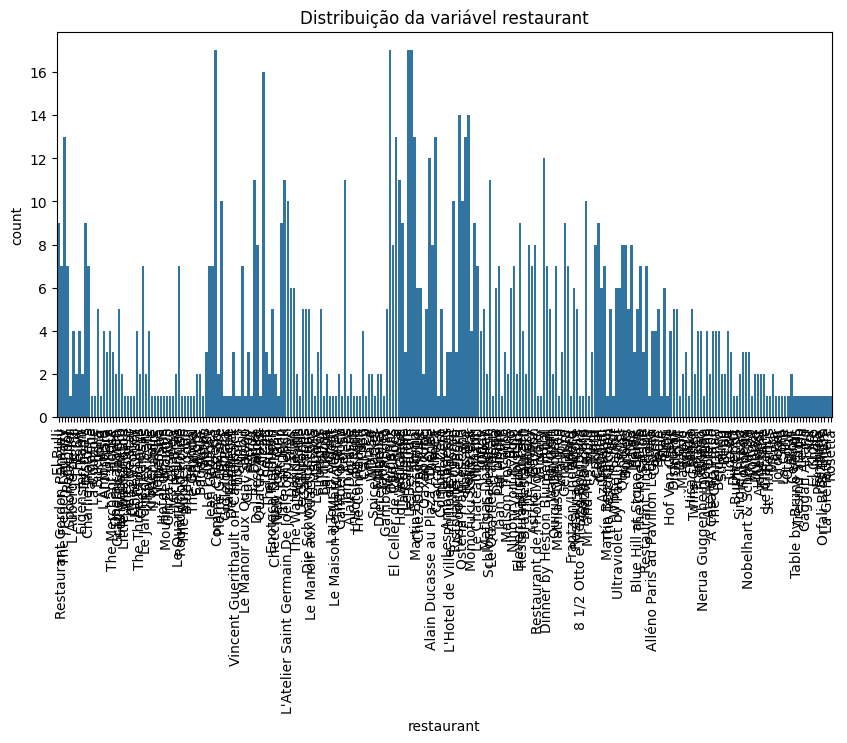

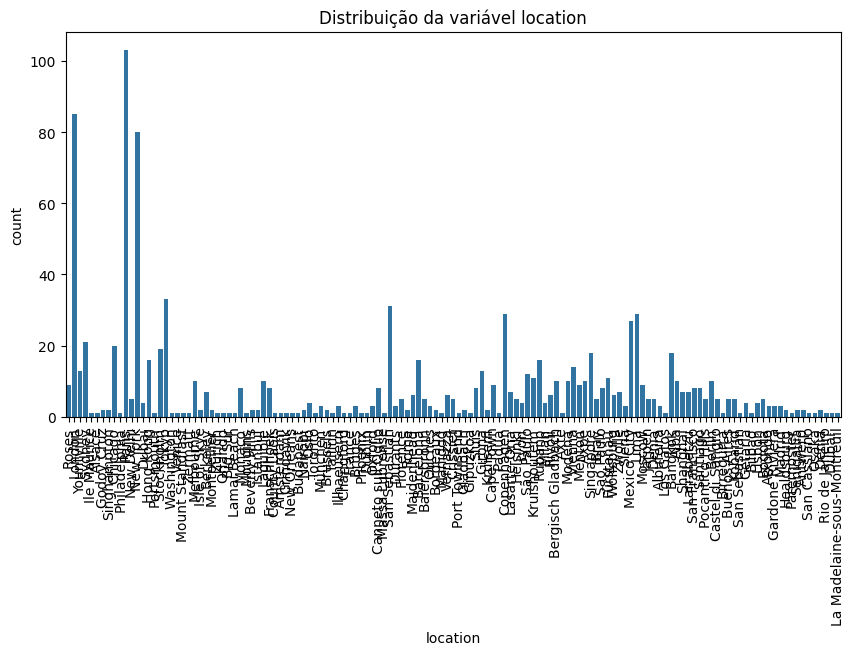

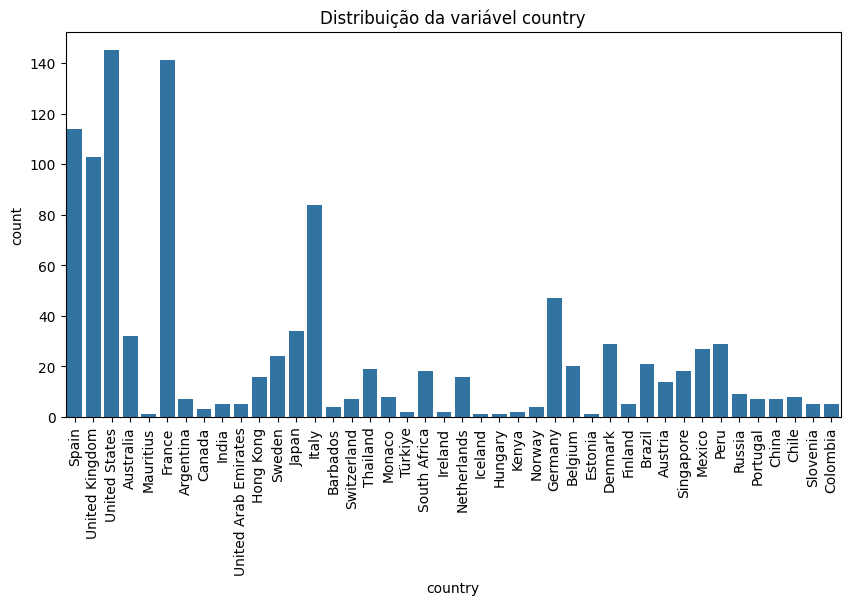

In [21]:
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribuição da variável {column}')
    plt.xticks(rotation=90)
    plt.show()

###Gráficos de dispersão entre variáveis numéricas (correlações)
Essa célula gera gráficos de dispersão para explorar correlações entre as variáveis numéricas.

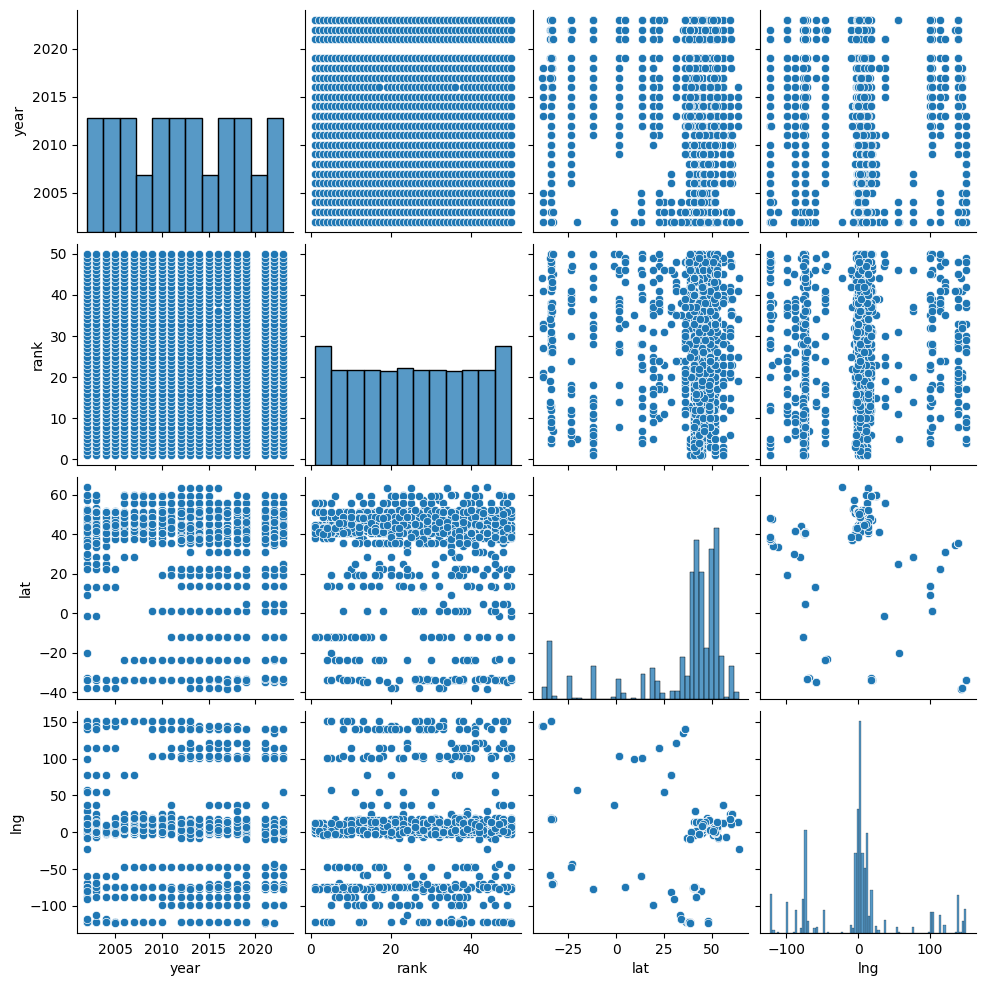

In [22]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
sns.pairplot(df[numerical_columns])
plt.show()

###Visualizações Básicas
Aqui, visualizamos a distribuição dos restaurantes por país através de um gráfico de barras, e a relação entre o ano e a posição no ranking com um gráfico de dispersão.

*Distribuição de Restaurantes por País*

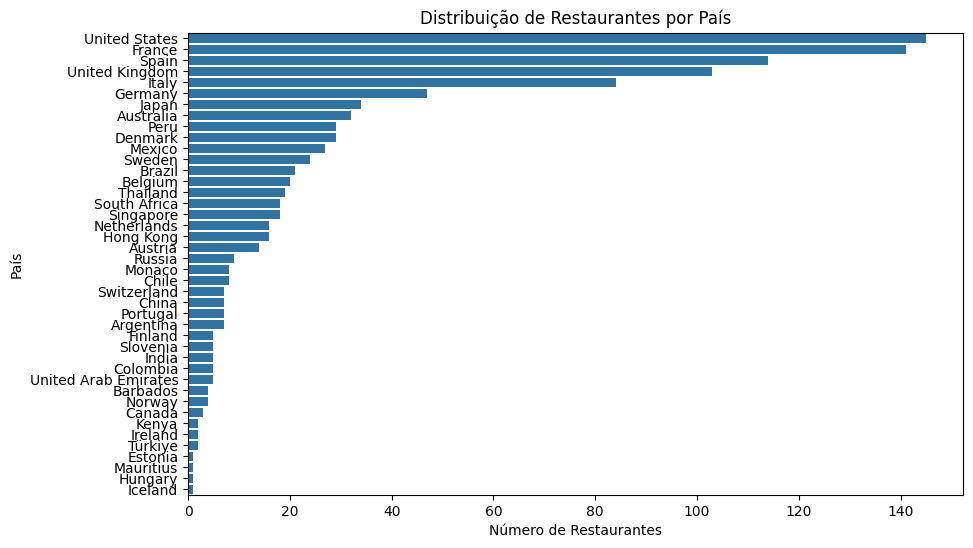

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='country', order=df['country'].value_counts().index)
plt.title('Distribuição de Restaurantes por País')
plt.xlabel('Número de Restaurantes')
plt.ylabel('País')
plt.show()


*Relação entre País e Posição no Ranking*

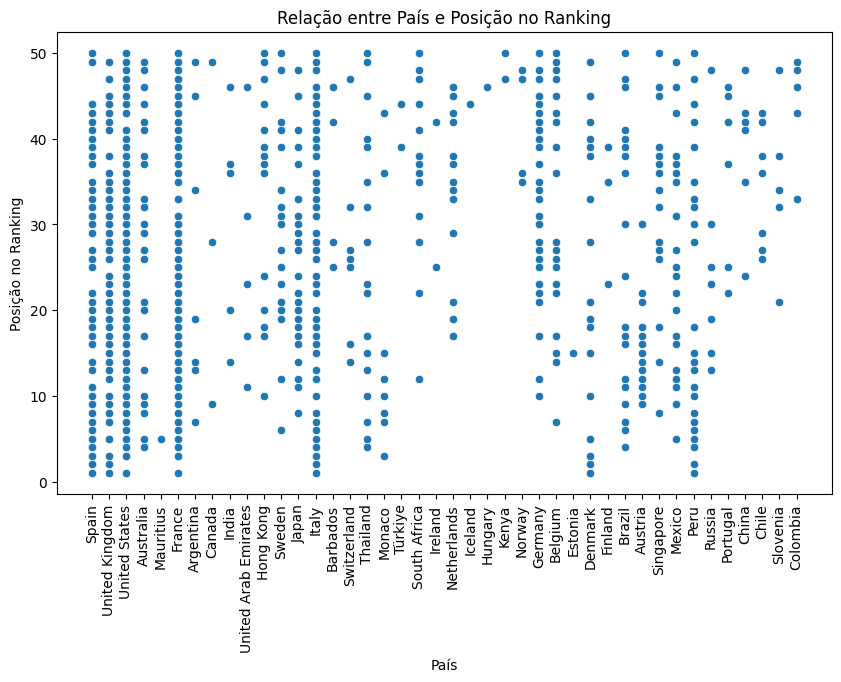

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='country', y='rank')
plt.title('Relação entre País e Posição no Ranking')
plt.xlabel('País')
plt.ylabel('Posição no Ranking')
plt.xticks(rotation=90)
plt.show()

*Relação entre Ano e Posição no Ranking*

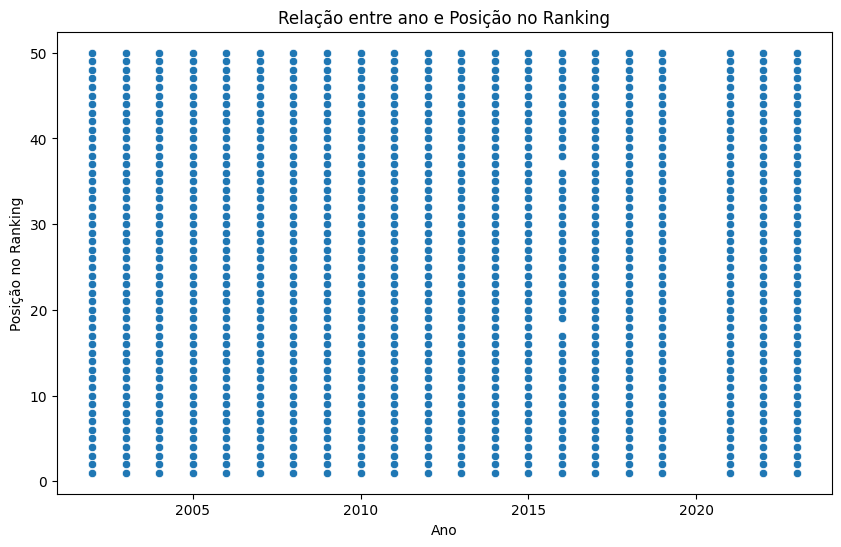

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='year', y='rank')
plt.title('Relação entre ano e Posição no Ranking')
plt.xlabel('Ano')
plt.ylabel('Posição no Ranking')
plt.show()



###Análise de Correlações
Esta etapa foca em entender a relação entre as variáveis numéricas do dataset (ano, posição no ranking, latitude, longitude) com uma matriz de correlação e um heatmap.

*Matriz de Correlação entre Variáveis Numéricas*

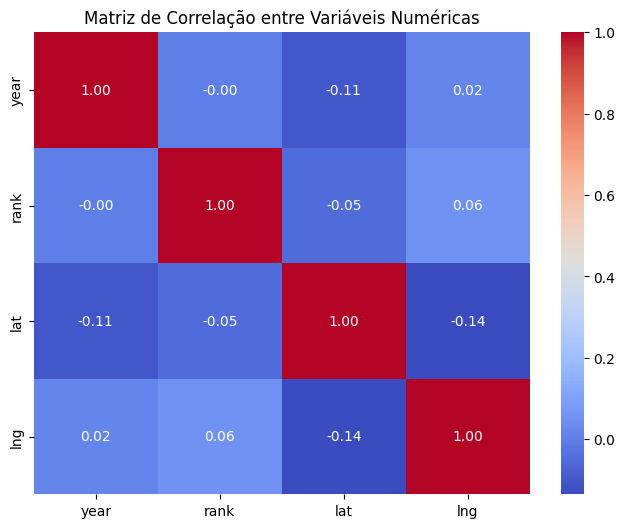

In [26]:
correlation_matrix = df[['year', 'rank', 'lat', 'lng']].corr()

# Heatmap da matriz de correlação
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()


In [27]:
# Seleciona apenas colunas numéricas para calcular a correlação
numerical_df = df.select_dtypes(include=np.number)
numerical_df.corr().hvplot.heatmap()


:HeatMap   [columns,index]   (value)

###Visualizações Interativas com HvPlot
Esta etapa utiliza hvplot para criar visualizações interativas da distribuição geográfica dos restaurantes, permitindo explorar detalhes através de um gráfico de dispersão interativo.

In [28]:
# Gráfico interativo da relação entre latitude e longitude dos restaurantes
df.hvplot.scatter(x='lat', y='lng', hover_cols=['restaurant', 'country'], title='Distribuição Geográfica dos Restaurantes')


:Scatter   [lat]   (lng,restaurant,country)

###Geração de Relatório Automatizado
Aqui, utilizamos a biblioteca ydata_profiling para gerar um relatório HTML automatizado que inclui uma análise detalhada e visualizações das características do dataset.



In [29]:
# Geração do relatório automatizado
profile = ydata_profiling.ProfileReport(df)
profile.to_file('WorldsBestRestaurants_ProfileReport.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]